In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0
1,1.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,0,7.0
2,2.0,NaN,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,3.0,2.0,0,NaN
3,2.0,2.0,2.0,1.0,NaN,0.0,2.0,0.0,2.0,2.0,...,NaN,0.0,0.0,2.0,0.0,NaN,2.0,2.0,0,7.0
4,2.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,NaN,0.0,NaN,NaN,2.0,NaN,2.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0,70.0
354,2.0,NaN,2.0,NaN,0.0,0.0,0.0,0.0,NaN,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,70.0
355,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0,70.0
356,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	69
float64		column 2	52
float64		column 3	35
float64		column 4	34
float64		column 5	35
float64		column 6	35
float64		column 7	34
float64		column 8	34
float64		column 9	34
float64		column 10	17
float64		column 11	52
float64		column 12	34
int64		column 13	0
float64		column 14	17
float64		column 15	51
float64		column 16	18
float64		column 17	17
float64		column 18	18
int64		column 19	0
float64		column 20	52
float64		column 21	17
float64		column 22	69
float64		column 23	18
float64		column 24	34
float64		column 25	52
float64		column 26	34
float64		column 27	52
float64		column 28	51
float64		column 29	52
float64		column 30	35
float64		column 31	35
float64		column 32	35
int64		column 33	0
float64		column 34	51


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,289.000000,306.000000,323.000000,324.000000,323.000000,323.000000,324.000000,324.000000,324.000000,341.000000,...,306.000000,324.000000,306.000000,307.000000,306.000000,323.000000,323.000000,323.000000,358.000000,307.000000
mean,2.076125,1.784314,1.600619,1.351852,0.613003,0.436533,0.160494,0.327160,0.574074,0.521994,...,0.326797,0.450617,0.441176,0.967427,0.424837,0.105263,0.092879,1.885449,0.558659,36.592834
std,0.613294,0.657279,0.869568,1.098675,0.885749,0.941535,0.566490,0.781601,0.946269,0.909242,...,0.779492,0.858773,0.946852,1.119749,0.931720,0.454177,0.443075,0.693272,1.107990,14.844521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

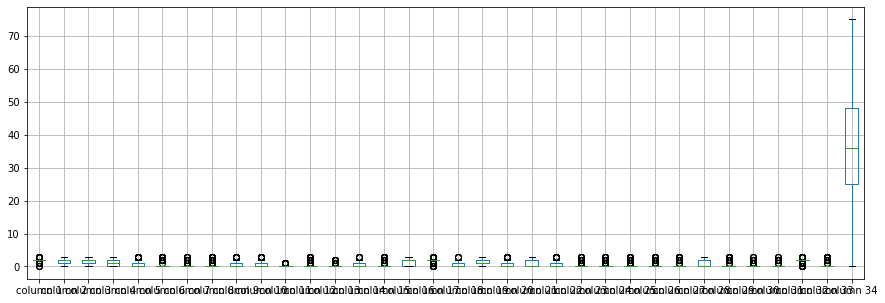

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.076125
column 2      1.784314
column 3      1.600619
column 4      1.351852
column 5      0.613003
column 6      0.436533
column 7      0.160494
column 8      0.327160
column 9      0.574074
column 10     0.521994
column 11     0.124183
column 12     0.388889
column 13     0.142458
column 14     0.542522
column 15     0.280130
column 16     1.376471
column 17     1.961877
column 18     0.488235
column 19     1.287709
column 20     0.575163
column 21     0.958944
column 22     0.532872
column 23     0.297059
column 24     0.308642
column 25     0.326797
column 26     0.450617
column 27     0.441176
column 28     0.967427
column 29     0.424837
column 30     0.105263
column 31     0.092879
column 32     1.885449
column 33     0.558659
column 34    36.592834
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.377943,0.258859,-0.022253,0.083252,0.018370,-0.107135,-0.064166,0.177609,0.225128,...,-0.048205,9.185997e-02,-0.017213,-0.003268,-0.030553,-0.025225,-0.052188,0.083778,-0.044653,-0.008202
column 2,0.377943,1.000000,0.323677,-0.128615,-0.037947,-0.045603,-0.103271,-0.074869,0.250882,0.224527,...,-0.126724,1.929813e-01,-0.069603,0.102676,-0.115658,-0.030122,-0.058671,0.062568,-0.111386,0.099418
column 3,0.258859,0.323677,1.000000,-0.086281,0.237159,0.300566,-0.182299,0.274694,0.296873,0.271417,...,0.242519,3.410092e-01,0.271484,-0.228813,0.254696,-0.099226,-0.065399,0.099259,0.266480,0.174775
column 4,-0.022253,-0.128615,-0.086281,1.000000,0.238154,0.386322,-0.145457,0.365792,-0.321655,-0.143033,...,0.324948,-2.207462e-01,0.342804,-0.035724,0.355249,-0.179215,-0.172277,0.006184,0.380271,0.064095
column 5,0.083252,-0.037947,0.237159,0.238154,1.000000,0.353584,-0.154438,0.424608,-0.068873,0.055096,...,0.398041,2.310905e-02,0.324630,-0.059295,0.338586,-0.147685,-0.141125,0.075254,0.365706,0.091693
column 6,0.018370,-0.045603,0.300566,0.386322,0.353584,1.000000,-0.125458,0.854971,-0.264885,-0.247444,...,0.870722,-1.203562e-01,0.906929,0.078693,0.886451,-0.088469,-0.093307,0.260738,0.912179,0.047117
column 7,-0.107135,-0.103271,-0.182299,-0.145457,-0.154438,-0.125458,1.000000,-0.122197,0.211881,-0.021466,...,-0.091135,-1.457216e-01,-0.126144,-0.017224,-0.119369,0.794396,0.818104,-0.134363,-0.137785,-0.351426
column 8,-0.064166,-0.074869,0.274694,0.365792,0.424608,0.854971,-0.122197,1.000000,-0.266961,-0.244646,...,0.863961,-1.255647e-01,0.872643,0.120759,0.887294,-0.068355,-0.090535,0.246989,0.881804,0.092826
column 9,0.177609,0.250882,0.296873,-0.321655,-0.068873,-0.264885,0.211881,-0.266961,1.000000,0.670800,...,-0.243672,4.589307e-01,-0.285493,-0.416775,-0.281667,0.197293,0.197053,-0.047670,-0.269150,-0.060046
column 10,0.225128,0.224527,0.271417,-0.143033,0.055096,-0.247444,-0.021466,-0.244646,0.670800,1.000000,...,-0.239811,4.917021e-01,-0.264165,-0.413999,-0.269402,-0.107993,-0.033560,0.046546,-0.260443,0.072113


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [34,34+67,34+67+67,34+67+67+67,34+67+67+67+67,34+67+67+67+67+67,34+67+67+67+67+67+67,34+67+67+67+67+67+67+67,34+67+67+67+67+67+67,34+67+67+67+67+67,34+67+67+67+67,34+67+67+67,34+67+67,34+67,34], vae_layer = False, seed = 67)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 66.46527446400036
Epoch: 1 , loss: 66.59930003773083
Epoch: 2 , loss: 66.31064987182617
Epoch: 3 , loss: 66.04780960083008
Epoch: 4 , loss: 65.90745613791726
Epoch: 5 , loss: 63.78496950322931
Epoch: 6 , loss: 62.20922990278764
Epoch: 7 , loss: 61.521615982055664
Epoch: 8 , loss: 60.761038693514735
Epoch: 9 , loss: 60.853730808604844
Epoch: 10 , loss: 59.9924465526234
Epoch: 11 , loss: 59.04311752319336
Epoch: 12 , loss: 59.33097908713601
Epoch: 13 , loss: 58.60605794733221
Epoch: 14 , loss: 58.40212475169789
Epoch: 15 , loss: 58.5195277820934
Epoch: 16 , loss: 58.016636241566054
Epoch: 17 , loss: 57.73126238042658
Epoch: 18 , loss: 57.7715989893133
Epoch: 19 , loss: 57.50627274946733
Epoch: 20 , loss: 57.07996663180265
Epoch: 21 , loss: 56.65839195251465
Epoch: 22 , loss: 56.740595210682265
Epoch: 23 , loss: 56.639208186756484
Epoch: 24 , loss: 56.10387576710094
Epoch: 25 , loss: 56.62378415194425
Epo

In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7     -0.007676
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.015087
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15    -0.043313
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.481969
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [24]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [25]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.057732,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-1.659346,...,0.478655,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.00000,0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,-0.38777,0,0.000000
2,0.000000,-0.462887,0.0,0.000000,0.000000,0.0,-2.872284,0.0,-1.565090,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.00000,0,19.474876
3,0.000000,0.000000,0.0,0.000000,1.018108,0.0,0.000000,0.0,0.000000,0.000000,...,0.346404,0.000000,0.0,0.000000,0.00000,-2.064322,0.00000,0.00000,0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.299472,0.0,-2.205504,0.52497,0.000000,-1.91939,0.00000,0,13.571884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.00000,0,0.000000
354,0.000000,-1.208282,0.0,1.224737,0.000000,0.0,0.000000,0.0,-2.507010,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.00000,0,0.000000
355,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.00000,0,0.000000
356,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.516144,0.00000,0.000000,0.00000,0.00000,0,0.000000


Calculating NRMSE Value

In [26]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [27]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [28]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(158.02905743068942, 758.0725558942231)

In [29]:
NRMS=numerator/denominator
NRMS


0.20846165212283432

In [30]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      1.939392
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     1.209296
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [31]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,2.057732,1.000000,1.0,1.000000,1.000000,0.0,0.000000,0.0,2.000000,0.340654,...,0.478655,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,0.00000,2,0.000000
1,1.000000,1.000000,2.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,2.000000,2.00000,1.61223,0,7.000000
2,2.000000,1.537113,1.0,0.000000,0.000000,0.0,0.127716,0.0,0.434910,0.000000,...,0.000000,0.000000,0.0,2.000000,0.00000,3.000000,3.00000,2.00000,0,26.474876
3,2.000000,2.000000,2.0,1.000000,1.018108,0.0,2.000000,0.0,2.000000,2.000000,...,0.346404,0.000000,0.0,2.000000,0.00000,-0.064322,2.00000,2.00000,0,7.000000
4,2.000000,2.000000,1.0,0.000000,0.000000,0.0,2.000000,0.0,2.000000,0.000000,...,0.000000,0.299472,0.0,0.794496,0.52497,2.000000,0.08061,2.00000,0,20.571884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,2.000000,0.0,2.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,3.000000,0.00000,0.000000,0.00000,3.00000,0,70.000000
354,2.000000,1.791718,2.0,1.224737,0.000000,0.0,0.000000,0.0,0.492990,2.000000,...,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,1.00000,0,70.000000
355,2.000000,2.000000,2.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,2.000000,0.00000,0.000000,0.00000,2.00000,0,70.000000
356,2.000000,1.000000,0.0,3.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.516144,0.00000,0.000000,0.00000,1.00000,0,70.000000


In [32]:
imputations[-1].to_excel("DERM_NW_10(imp).xlsx", index=False, header=False)